# Machine Learning na prática

<br><br>

Neste notebook iremos trabalhar com um __case prático__ de data science de modo a cobrir os principais tópicos quando estamos diante de um problema real.

As __principais etapas__ do problema serão divididas como segue:

__1- Entender o problema de dados que queremos resolver; <br>
2- Análise exploratória dos dados - geração de insights;<br>
3- Preparação dos dados para os modelos de aprendizado de máquina;<br>
4- Aprendizado de máquina;__<br>

<br>

## 1- Entender o problema de dados que queremos resolver

<br>

Suponha que você é um cientista de dados de uma empresa de vendas de imóveis contratado para __resolver o seguinte problema: construir um modelo de apreçamento__ no estado da Califórnia, Estados Unidos. 

Os dados estão disponíveis num arquivo .csv (a ser apresentado abaixo); cada linha do dataset corresponde a um distrito, marcado por uma latitude e uma longitude. 

Ainda, para cada distrito, temos informações como tamanho da população, salário médio da população, quantidade de famílias que habitam o distrito, bem como informações gerais das casas. 

Finalmente, temos a variável preço mediano das casas neste distrito. __Essa é a variável target__ do problema e nosso __objetivo__ é __aprender__, através de um modelo de aprendizado de máquina, __padrões que relacionem o preço mediano das casas num distrito com outras informações do distrito em si.__


# FOTO DA COSTA DA CALIFÓRNIA

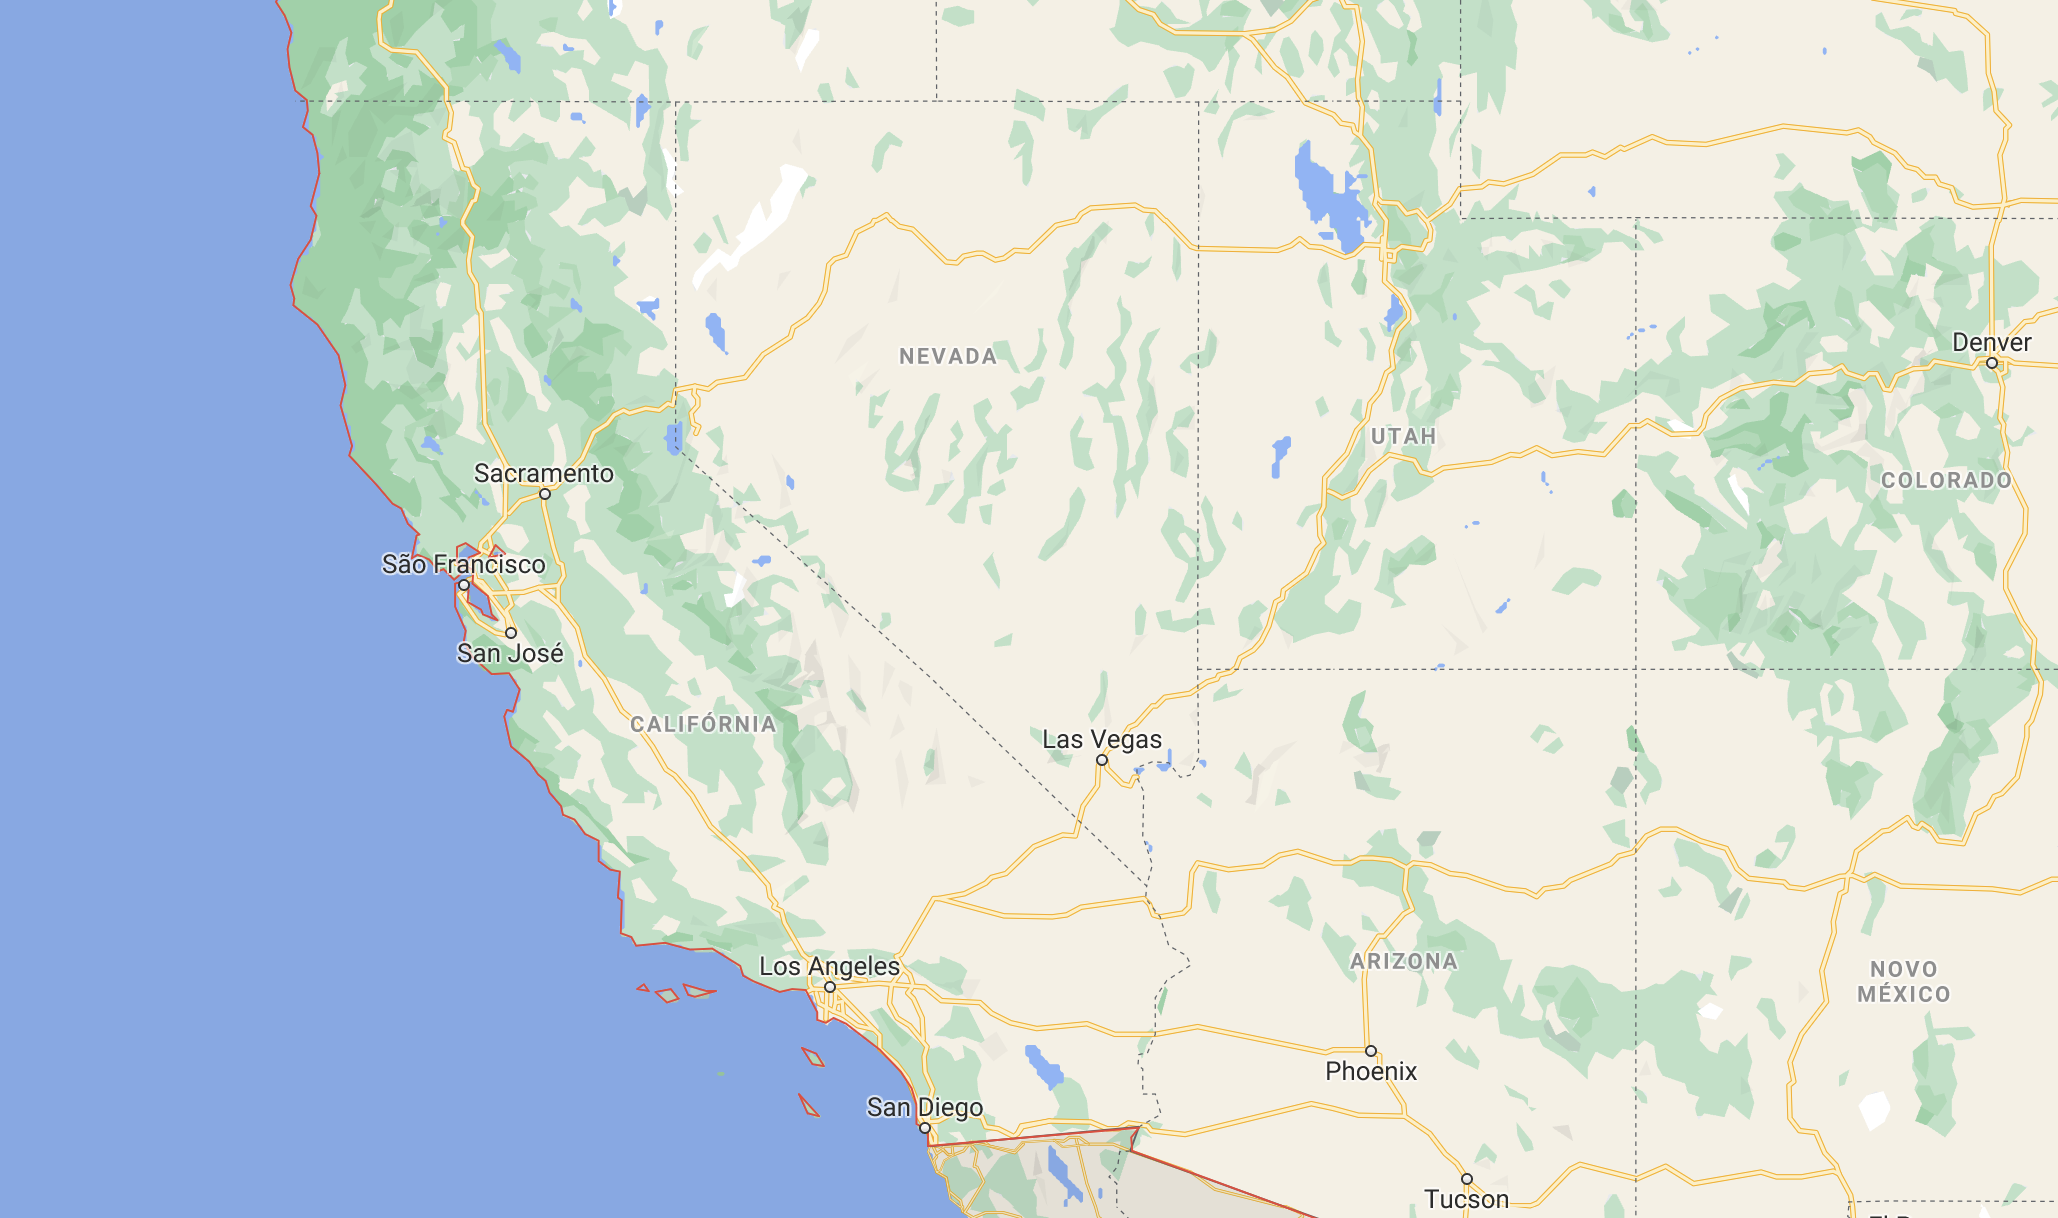

<br><br>

## 2- Análise exploratória dos dados

<br>

Vamos começar por acessar os dados.

O acesso aos dados depende muito da infraestrutura de dados na qual o cientista de dados está trabalhando. No caso em questão, assumiremos que temos os dados em uma arquivo .csv.

In [1]:
#importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importando os dados

df = pd.read_csv("preco_casas.csv")
print(df.shape)
df.head(10)

(20640, 10)


,longitude,latitude,idade_mediana_das_casas,total_comodos,total_quartos,populacao,familias,salario_mediano,preco_mediano_das_casas,proximidade_ao_mar
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,PERTO DA BAÍA
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,PERTO DA BAÍA
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,PERTO DA BAÍA
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,PERTO DA BAÍA
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,PERTO DA BAÍA
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,PERTO DA BAÍA
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,PERTO DA BAÍA
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,PERTO DA BAÍA
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,PERTO DA BAÍA
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,PERTO DA BAÍA


<br>

Agora, vamos explorar um pouco dos dados a fim de aprender algumas informações. Neste primeiro momento, vamos plotar a dispersão da latitude pela longitude:

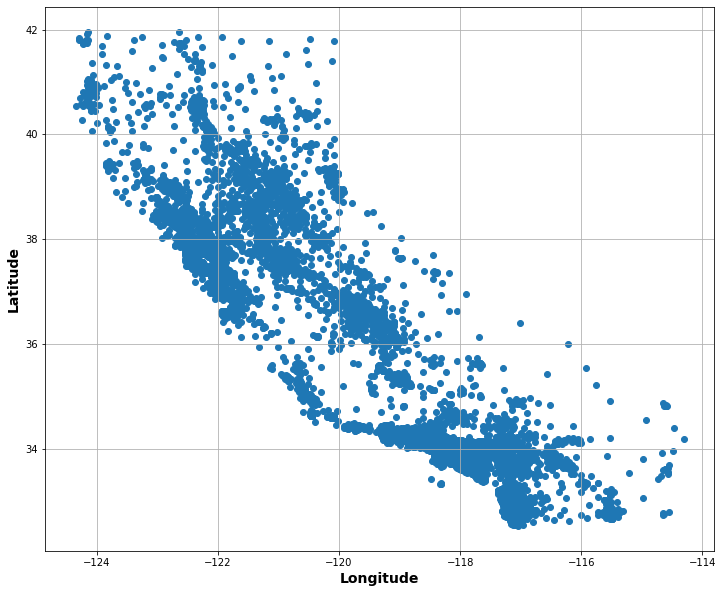

In [3]:
plt.figure(figsize=[12,10])
plt.scatter(df.longitude, df.latitude)
plt.xlabel("Longitude", fontsize = 14, fontweight = 'bold')
plt.ylabel("Latitude", fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()

Comparando com o mapa da costa americana, vemos uma grande similaridade. Concluimos que nosso dataset consiste de informações de toda a costa.

Vamos abaixo alterar alguns parâmetros do nosso plot de modo a ter mais insights.

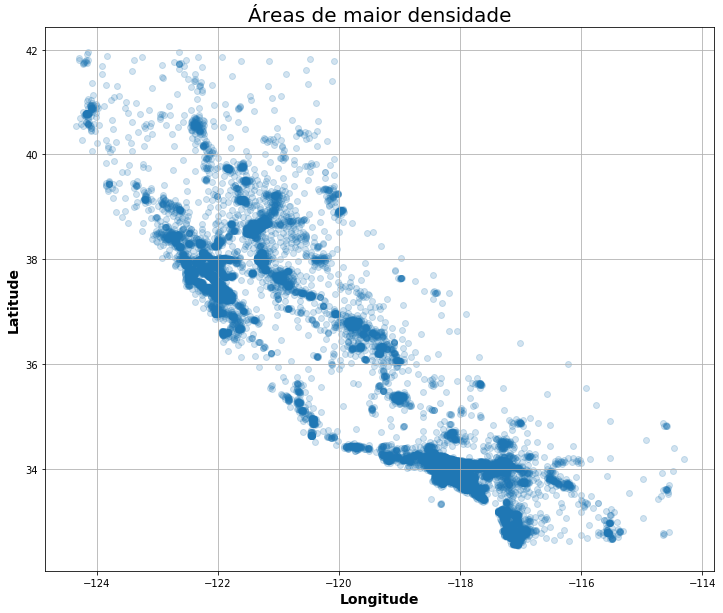

In [4]:
plt.figure(figsize=[12,10])
plt.scatter(df.longitude, df.latitude, alpha = 0.2)
plt.title("Áreas de maior densidade", fontsize = 20)
plt.xlabel("Longitude", fontsize = 14, fontweight = 'bold')
plt.ylabel("Latitude", fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()

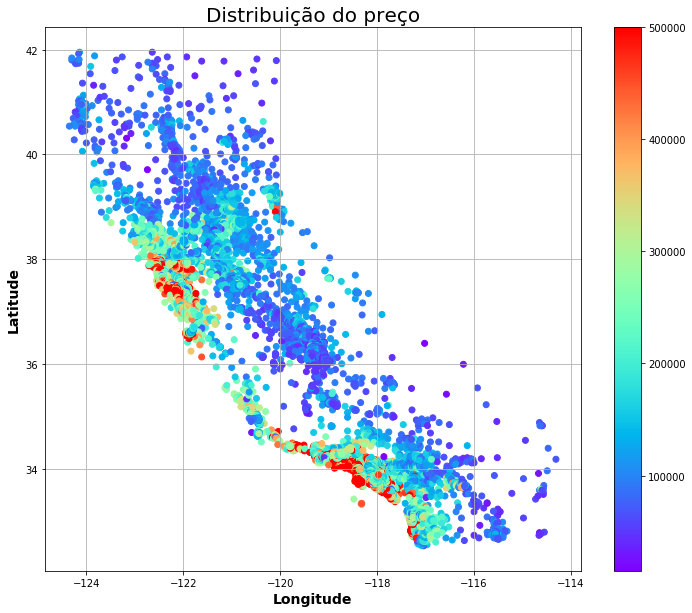

In [5]:
plt.figure(figsize=[12,10])
plt.scatter(df.longitude, df.latitude, c = df.preco_mediano_das_casas, cmap = plt.cm.rainbow)
plt.title("Distribuição do preço", fontsize = 20)
plt.xlabel("Longitude", fontsize = 14, fontweight = 'bold')
plt.ylabel("Latitude", fontsize = 14, fontweight = 'bold')
plt.colorbar()
plt.grid()
plt.show()

BOLINHAS MAIORES REPRESENTAM AREAS COM MAIOR POPULAÇÃO


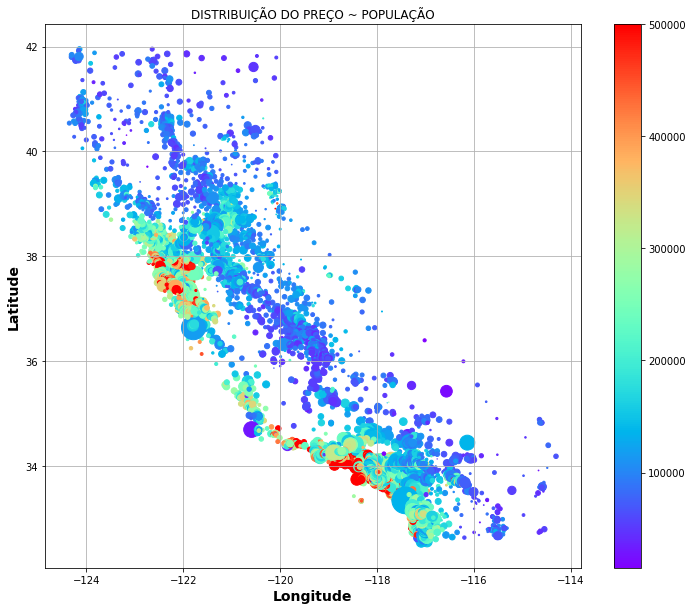

In [6]:
print("BOLINHAS MAIORES REPRESENTAM AREAS COM MAIOR POPULAÇÃO")
plt.figure(figsize=[12,10])
plt.scatter(df.longitude, df.latitude, 
            c = df.preco_mediano_das_casas, 
            s = df.populacao / 50,
            cmap = plt.cm.rainbow)
plt.title("DISTRIBUIÇÃO DO PREÇO ~ POPULAÇÃO", fontsize = 12)
plt.xlabel("Longitude", fontsize = 14, fontweight = 'bold')
plt.ylabel("Latitude", fontsize = 14, fontweight = 'bold')
plt.colorbar()
plt.grid()
plt.show()


Apenas com os gráficos acima, conseguimos descobrir quais são as áreas mais densas; também descobrimos que as regiões com preços mais altos estão, de forma geral, perto da costa. Além disso, também temos a distribuição da população e conseguimos localizar visualmente quais são as áreas mais populosas.

<br>

Abaixo, vamos analisar a __correlação__ das variáveis explicativas com a variável target:

In [7]:
df.corr()['preco_mediano_das_casas']

longitude                 -0.045967
latitude                  -0.144160
idade_mediana_das_casas    0.105623
total_comodos              0.134153
total_quartos              0.049686
populacao                 -0.024650
familias                   0.065843
salario_mediano            0.688075
preco_mediano_das_casas    1.000000
Name: preco_mediano_das_casas, dtype: float64

Vemos que a varíavel salario_mediano possui uma alta correlação com a variável target, perto de 0.7.

Isso é intuitivo, pois populações com salários maiores tendem a morar em regiões mais caras, ou seja, áreas cujo preço mediano das casas é maior.

Vejamos abaixo um gráfico de dispersão entre essas duas variáveis:

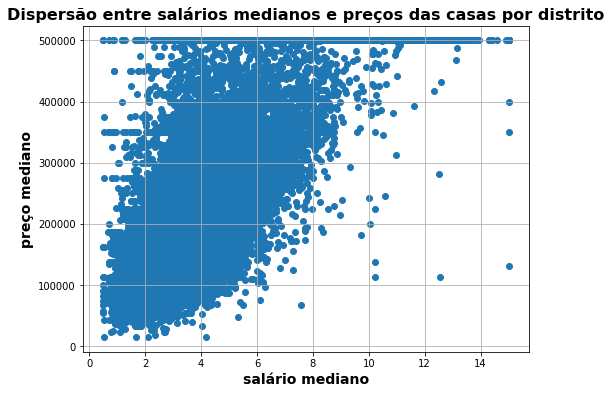

In [8]:
plt.figure(figsize=[8,6])
plt.scatter(df.salario_mediano, df.preco_mediano_das_casas)
plt.title("Dispersão entre salários medianos e preços das casas por distrito", fontsize = 16, fontweight = 'bold')
plt.xlabel("salário mediano", fontsize = 14, fontweight = 'bold')
plt.ylabel("preço mediano", fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()

<br>

O gráfico acima ilustra bem uma alta relação linear entre as duas variáveis.

Vamos aplicar um modelo de regressão linear simples para explicar o preço mediano a partir do salário:

<br>

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lm_exp = LinearRegression()

In [11]:
X = df.salario_mediano.values.reshape(-1,1)
y = df.preco_mediano_das_casas.values

lm_exp.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

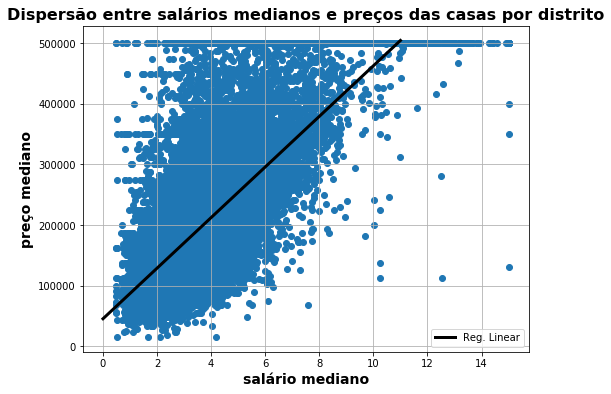

In [12]:
plt.figure(figsize=[8,6])
plt.scatter(df.salario_mediano, df.preco_mediano_das_casas)
plt.title("Dispersão entre salários medianos e preços das casas por distrito", fontsize = 16, fontweight = 'bold')
plt.xlabel("salário mediano", fontsize = 14, fontweight = 'bold')
plt.ylabel("preço mediano", fontsize = 14, fontweight = 'bold')
plt.grid()

#inserindo a reta da regressão linear
xlims = np.arange(0,12)
plt.plot(xlims, lm_exp.predict(xlims.reshape(-1,1)), c = 'black', lw = 3, label = 'Reg. Linear')
plt.legend()
plt.show()

<br><br>

## 3- Preparação dos dados para os modelos de aprendizado de máquina

<br>

A partir de agora iremos trabalhar na manipulação dos dados com o intuito de construir modelos de machine learning capazes de resolver nosso problema: prever o preço mediano das casas em casa localização, a partir das informações que possuimos daquela localidade.

Como já discutimos, o objetivo básico de machine learning é a capacidade de generalizar, então para isso vamos começar dividindo nossos dados nos conjuntos de treinamento e teste. Iremos usar a função "train_test_split" da biblioteca scikit-learn para isso.

In [13]:
#importando a função

from sklearn.model_selection import train_test_split

In [14]:
#escolhemos 25% dos dados para teste

dftrain, dftest = train_test_split(df, test_size = 0.25, random_state = 0)
print(df.shape)
print(dftrain.shape)
print(dftest.shape)

(20640, 10)
(15480, 10)
(5160, 10)


Vamos abaixo trabalhar com quatro etapas do processo de modelagem:
    
    1- Engenharia de variáveis

    2- Tratamento de valores faltantes

    3- Tratamento de variáveis categóricas

    4- Normalização dos dados
    
    
    
#### Para fins didáticos, iremos usar o dataset "df" para essas etapas.

Ao final, __iremos construir uma função que realiza todas essas etapas em conjunto__ - o que também é conhecido como __pipeline de processamento de dados__ - e aplicaremos nos dados de treino e de teste.

<br>

### 3.1- Engenharia de variáveis

<br>

Uma parte fundamental no processo de machine learning é a __"engenharia de variáveis"__. Aqui, o objetivo é __enriquecer o dataset__ atual através da manipulação e __construção de novas variáveis.__

Por exemplo, no contexto do problema, podemos levantar algumas perguntas que nos motivarão a construir as variáveis:

    - Qual o número médio de comodos por famílias? 
    
    - Qual a relação entre a quantidade de cômodos e quartos ?
    
    - Qual o tamanho médio das famílias?
    
    
Podemos enriquecer nosso dataset criando variáveis que visam responder essas perguntas:

In [15]:
df["comodos_por_familia"] = df["total_comodos"]/df["familias"]
df["quartos_por_comodos"] = df["total_quartos"]/df["total_comodos"]
df["populacao_por_familia"]= df["populacao"]/df["familias"]

__Ponto fundamental sobre engenharia de variáveis:__ Não devemos usar nossa variável target (resposta) na construção de novas features, visto que, apesar de termos a variável resposta para fins de treinamento do modelo, __não teremos essa variável__ em conjuntos de dados futuros, impossibilitando o uso da mesma na construção de novas features. 

<br>

### 3.2- Tratamento de valores faltantes

<br>

Como já comentamos em outros módulos, vários modelos de machine learning não conseguem trabalhar com dados faltantes, de forma que é fundamental tratar essa questão.

Aqui, podemos trabalhar com várias alternativas; algumas seriam:

    - Excluir as colunas que contenham valores faltantes;
    
    - Excluir as linhas que contenham valores faltantes;
    
    - Preencher os valores faltantes com alguma estatística atrelada a coluna: por exemplo, preencher os valores faltantes da variável "total_quartos" com a média (ou mediana) dessa variável.
    
Vejamos abaixo a distribuição da quantidade de valores faltantes por cada variável no dataset:

In [16]:
df.isnull().sum()

longitude                    0
latitude                     0
idade_mediana_das_casas      0
total_comodos                0
total_quartos              207
populacao                    0
familias                     0
salario_mediano              0
preco_mediano_das_casas      0
proximidade_ao_mar           0
comodos_por_familia          0
quartos_por_comodos        207
populacao_por_familia        0
dtype: int64

Vemos que a variável original "total_quartos" possui 207 instâncias faltantes, o que acarretou que a variável "quartos_por_comodos" também tivesse esses valores faltantes.

Para fins didáticos, neste problema iremos apenas exlcluir as linhas que possuam valores faltantes:

In [17]:
df_sem_null = df.dropna(axis = 0)
df_sem_null.shape, df.shape

((20433, 13), (20640, 13))

Vemos acima que o dataset "df_sem_null" está com 207 linhas a menos do que o "df", justamente as linhas que haviam valores faltantes e foram exluídas.

<br>

### 3.3- Tratamento de variáveis categóricas

<br>

Como já foi discutido, variáveis categóricas devem ser trabalhadas afim de serem usadas em modelos de machine learning. Existem dois processamentos mais imediatos que podemos fazer neste caso:
    
    1- Para cada valor categórico, associar a um valor numérico;
    
    2- Aplicar a técnica OHE (ONE HOT ENCODING) nas categorias;
    
    
No nosso problema, a única variável categórica é a "proximidade_ao_mar" e iremos tratá-la.

Neste caso, iremos fazer um OHE (alternativa 2- acima).

In [18]:
df.proximidade_ao_mar.value_counts()

<1H OCEANO       9136
INTERIOR         6551
PERTO OCEANO     2658
PERTO DA BAÍA    2290
ILHA                5
Name: proximidade_ao_mar, dtype: int64

In [19]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

df_prox_mar_OHE = cat_encoder.fit_transform(df[['proximidade_ao_mar']]).toarray()

In [20]:
df_prox_mar_OHE

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [21]:
cat_encoder.categories_

[array(['<1H OCEANO', 'ILHA', 'INTERIOR', 'PERTO DA BAÍA', 'PERTO OCEANO'],
       dtype=object)]

In [22]:
cat_encoder.inverse_transform(df_prox_mar_OHE)

array([['PERTO DA BAÍA'],
       ['PERTO DA BAÍA'],
       ['PERTO DA BAÍA'],
       ...,
       ['INTERIOR'],
       ['INTERIOR'],
       ['INTERIOR']], dtype=object)

<br>

### 3.4- Normalização dos dados

<br>

Apesar de alguns modelos não precisarem ter os dados normalizados, essa etapa é também fundamental em alguns modelos de machine learning. Para citar alguns, podemos citar KNN's, Redes Neurais e SMV's. 

Abaixo, vamos aplicar normalização no dataset "df":

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [24]:
variaveis_para_normalizar = ['idade_mediana_das_casas',
                             'total_comodos',
                             'total_quartos',
                             'populacao',
                             'familias',
                             'salario_mediano',
                             'comodos_por_familia',
                             'quartos_por_comodos',
                             'populacao_por_familia']

In [25]:
sc.fit(df[variaveis_para_normalizar])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
sc.transform(df[variaveis_para_normalizar])

array([[ 0.98214266, -0.8048191 , -0.97032521, ...,  0.62855945,
        -1.1460242 , -0.04959654],
       [-0.60701891,  2.0458901 ,  1.34827594, ...,  0.32704136,
        -0.98725423, -0.09251223],
       [ 1.85618152, -0.53574589, -0.82556097, ...,  1.15562047,
        -1.44051403, -0.02584253],
       ...,
       [-0.92485123, -0.17499526, -0.12547157, ..., -0.09031802,
         0.03680837, -0.0717345 ],
       [-0.84539315, -0.35559977, -0.30583358, ..., -0.04021111,
         0.11820445, -0.09122515],
       [-1.00430931,  0.06840827,  0.18541559, ..., -0.07044252,
         0.14049521, -0.04368215]])

<br>

Tendo discutido todas essas etapas de preprocessamento dos dados, vamos __encapsular__ essas etapas numa função única de processamento dos dados, a fim de automatizar esse processo:

In [27]:
def preprocessamento_completo(df, dataset_de_treino = True, cat_encoder = None, std_scaler = None):

    dff = df.copy()

    #criação de novas variáveis
    dff["comodos_por_familia"] = dff["total_comodos"]/dff["familias"]
    dff["quartos_por_comodos"] = dff["total_quartos"]/dff["total_comodos"]
    dff["populacao_por_familia"]= dff["populacao"]/dff["familias"]

    #retirando valores faltantes
    dff = dff.dropna(axis = 0)
    
    variaveis_para_normalizar = ['latitude',
                                 'longitude',
                                'idade_mediana_das_casas',
                                 'total_comodos',
                                 'total_quartos',
                                 'populacao',
                                 'familias',
                                 'salario_mediano',
                                 'comodos_por_familia',
                                 'quartos_por_comodos',
                                 'populacao_por_familia']

    if dataset_de_treino:  
        
        #OHE
        encoder = OneHotEncoder()
        df_prox_mar_OHE = encoder.fit_transform(dff[['proximidade_ao_mar']]).toarray()

        #normalização
        sc = StandardScaler()
        variaveis_norm = sc.fit_transform(dff[variaveis_para_normalizar])
        
        X, y =  np.c_[df_prox_mar_OHE, variaveis_norm], dff.preco_mediano_das_casas.values
        return X, y, encoder, sc
    
    else:
        #OHE
        df_prox_mar_OHE = cat_encoder.transform(dff[['proximidade_ao_mar']]).toarray()
        
        #normalização
        variaveis_norm = std_scaler.transform(dff[variaveis_para_normalizar]) 
        
        X, y =  np.c_[df_prox_mar_OHE, variaveis_norm], dff.preco_mediano_das_casas.values
        return X, y

In [28]:
Xtrain, ytrain, encoder_train, scaler_train  = preprocessamento_completo(df = dftrain, 
                                                                         dataset_de_treino = True, 
                                                                         cat_encoder = None, 
                                                                         std_scaler = None)

In [29]:
Xtrain.shape, ytrain.shape, dftrain.shape

((15331, 16), (15331,), (15480, 10))

Veja que a dimensão de Xtrain e dftrain estão diferentes! 

De fato, foram criadas variáveis novas dentro da função acima, bem como foi aplicado one-hot-encoding, o que também aumenta a dimensão do dataset.

A função acima, além de retornar os arrays Xtrain, ytrain já devidamente preprocessados e prontos para serem consumidos pelos modelos de aprendizado de máquina, retornam os objetos encoder_train e scaler_train, que foram fitados com as informações advindas do dataset de treino - dftrain.

Abaixo, iremos aplicar as transformações no dataset de teste - dataset que iremos usar apenas no final do notebook, após a escolha do modelo de aprendizado de máquina final. 

In [30]:
Xtest, ytest = preprocessamento_completo(df = dftest, 
                                         dataset_de_treino = False, 
                                         cat_encoder = encoder_train, 
                                         std_scaler = scaler_train)

In [31]:
Xtest.shape, ytest.shape, dftest.shape

((5102, 16), (5102,), (5160, 10))

<br>

## 4- Aprendizado de máquina

<br>

Nesta etapa, estaremos __testando vários modelos__ com o intuito de __prever o preço mediano das casas por região.__ Iremos testar algoritmos já estudados, como a __regressão linear__ e o __KNN__. Além disso, testaremos também outro algoritmo, a __árvore de decisão__ - que será detalhada em módulos futuros.

Ainda, usaremos a biblioteca __scikit-learn__ para esses modelos. 

Finalmente, precisamos __fixar uma métrica de performance__ dos modelos a fim de compará-los. Já conhecemos o erro médio quadrático - também conhecido como MSE (mean squared error, em inglês) - e a raíz quadrada do erro, o RMSE (root mean squared error). Para fins didáticos, iremos trabalhar com outra métrica de regressão, também muito usada no contexto: o __coeficiente de determinação__, também conhecido como __$R^{2}$__ - leia-se "R quadrado".

<br>

Para a fórmula do $R^{2}$, vamos definir as quantias:

### $SQ_{tot}$ =  $\sum_i{(y_i - y_{medio})^{2}}$,
em que $y_{medio}$ é a média da variável target, y.

### $SQ_{res}$ =  $\sum_i{(y_i - y_{pred})^{2}}$,

e definimos o __$R^{2}$__ por

### $R^{2}$ = 1 - $( SQ_{res} / SQ_{tot} )$


<br>

Na prática, esperamos que nossas predições sejam próximas dos valores reais, de modo que $SQ_{res}$ seja pequeno. Além disso, $SQ_{tot}$ pode ser interpretado como se fosse o tamanho do erro caso usássemos um modelo cujas predições fossem sempre a média da variável target.

Desta forma, para modelos genéricos de aprendizado de máquina, o $R^{2}$ pode valer no máximo 1, sendo que quanto maior, melhor.

<br>

Vamos importar os algoritmos que iremos usar, bem como construir as métricas de performance que iremos acompanhar.

In [32]:
#algoritmos
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#metricas de performance
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
def RMSE(ytrue, ypred):
    return np.sqrt(mean_squared_error(y_true = ytrue, y_pred = ypred))

Vamos começar por treinar o modelo de regressão linear nos dados e avaliar o RMSE e o R2 nos dados de treino:

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
RMSE(ytrue = ytrain, ypred = lin_reg.predict(Xtrain))

67721.85762588063

In [36]:
r2_score(y_true=ytrain, y_pred=lin_reg.predict(Xtrain))

0.6565658565752921

Agora, vamos testar algumas versões do  KNN, considerando diferentes números de vizinhos.

Iremos também testar algumas versões das árvores de decisão - para fins de comparação.

Como veremos abaixo, o scikit-learn facilita muito a usabilidade dos modelos, de modo que somos capazes de testar alguns modelos mesmo sem conhecer os detalhes de seu funcionamento!  De quaquer forma, __as árvores de decisão serão estudadas em mais detalhes nos próximos módulos.__

Por agora, considere que essa classe de algoritmos - árvores de decisão - possuem vários hiperparâmetros a serem definidos. Iremos considerar um específico: max_depth, que seria a "profundidade da árvore".

In [37]:
num_vizinhos = [1, 2, 5, 10, 20, 50]

for n in num_vizinhos:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(Xtrain, ytrain)
    
    preds = knn.predict(Xtrain)
    
    rmse_train = RMSE(ytrue = ytrain, ypred = preds)
    r2_train = r2_score(y_true = ytrain, y_pred = preds)
    
    print("K = " + str(n) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

K = 1 | RMSE:0.0 / R2: 1.0
K = 2 | RMSE:37638.89 / R2: 0.89
K = 5 | RMSE:49153.27 / R2: 0.82
K = 10 | RMSE:53938.69 / R2: 0.78
K = 20 | RMSE:57477.0 / R2: 0.75
K = 50 | RMSE:61515.84 / R2: 0.72


In [38]:
max_profundidades = [1, 5, 10, 100]

for m in max_profundidades:
    dt = DecisionTreeRegressor(max_depth = m)
    dt.fit(Xtrain, ytrain)
    
    preds = dt.predict(Xtrain)
    
    rmse_train = RMSE(ytrue = ytrain, ypred = preds)
    r2_train = r2_score(y_true = ytrain, y_pred = preds)
    
    print("Profundidade da árvore = " + str(m) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

Profundidade da árvore = 1 | RMSE:95607.04 / R2: 0.32
Profundidade da árvore = 5 | RMSE:65533.2 / R2: 0.68
Profundidade da árvore = 10 | RMSE:45419.28 / R2: 0.85
Profundidade da árvore = 100 | RMSE:0.0 / R2: 1.0


<br>

Vemos que os modelos KNN(K=1) e DecTree(max_depth = 100) ambos tiveram um R2 de 1.0 (melhor R2 possível!) e um RMSE de 0 (menor RMSE possível!)

Mas, do que já estudamos, é muito provável que esses modelos estejam sofrendo de __overfitting__.

Como podemos resolver essa questão?

Do que já discutimos, __não queremos avaliar nossos modelos no dataset de teste até termos decidido um modelo final__. Portanto, uma saída seria dividir o dataset de treinamento em dois conjuntos menores, um exclusivo para treinamento do modelo e outro exclusivo para validação das métricas.

Mas podemos usar uma alternativa ainda mais interessante! __Validação cruzada__, ou, também muito conhecida com o nome em inglês, __cross-validation__.

<br><br>

O mecanismo de validação cruzada consiste de dividir o dataset de treino em K partes (ou folds) de mesmo tamanho. Aqui, o valor de K deve ser fixado de antemão. Tendo dividido o dataset nas K partes, iremos proceder da seguinte forma: fixamos 1 parte (parte de validação) e usamos as outras todas para treinar o modelo; iremos avaliá-lo nesta parte. Na sequência, escolhemos outra parte para validação e treinamos novamente o modelo nas outras partes restantes. Seguimos assim até esgotarmos todas as partes de validação.

A figura abaixo ilustra a validação cruzada considerando uma divisão do dataset em 5 partes.


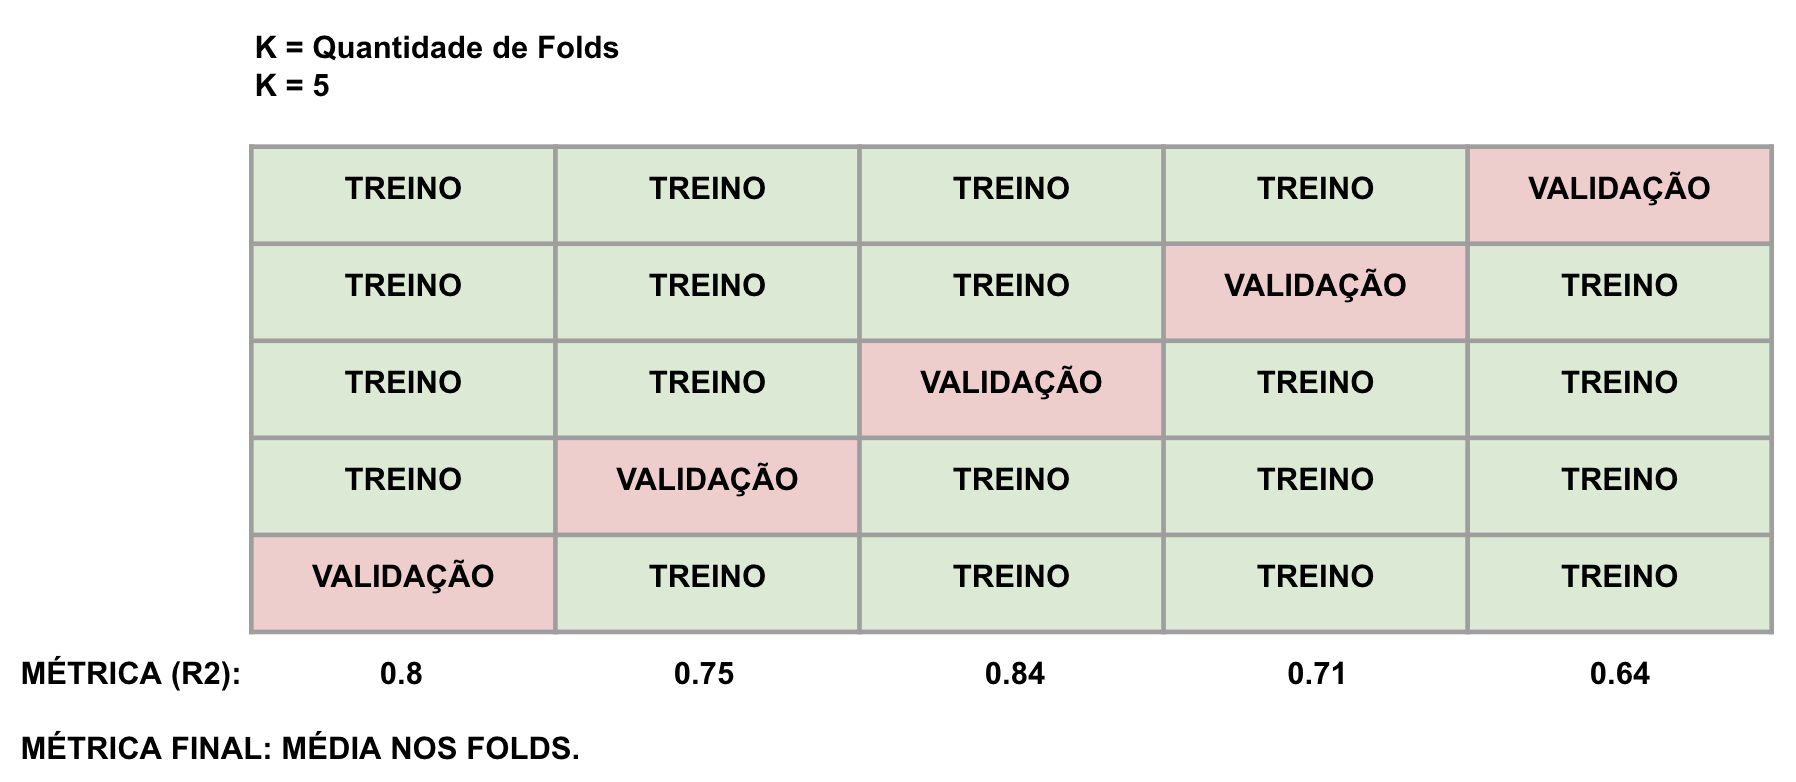

<br>

Vamos, novamente, usar o scikit-learn para aplicarmos a validação cruzada. Comecemos por importar a função:

In [39]:
from sklearn.model_selection import cross_val_score

Essa função - cross_val_score - recebe os parâmetros:
    
    1- estimador (modelo) a ser usado;
    2- variaveis explicativas;
    3- variável target;
    4- parâmetro cv: quantidade de folds que a validação cruzada irá fazer;
    5- métrica a ser avaliada.
    
    
Abaixo, aplicamos a validação cruzada para a regressão linear em nosso problema, considerando 5 folds e o R2 como a métrica de performance a ser medida. Veja:

In [40]:
cv_lin_reg = cross_val_score(estimator = LinearRegression(), 
                             X = Xtrain, 
                             y = ytrain, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_lin_reg)
print('media: ', cv_lin_reg.mean())
print('desvio padrão: ', cv_lin_reg.std())

[0.66386998 0.65645392 0.64557325 0.66233305 0.63960234]
media:  0.6535665063371939
desvio padrão:  0.009489373772358253


Acima, temos o resultado do R2 médio para os 5 folds de validação no modelo de regressão linear.

Lembrando que o R2 em treino foi de 0.65, vemos que o modelo de regressão linear, apesar de não ter uma ótima performance no dataset, não está overfitando, uma vez que as métricas em treino e cross-validação estão se mantendo.

Ainda, destacamos que o desvio padrão do R2 nos folds de validação é baixo, mostrando uma estabilidade do modelo.

Abaixo, vamos criar uma função para facilitar nossas análises dos modelos:

In [41]:
def cross_validation_R2_results(modelo, nome_modelo, X, y, num_folds):
    cv_results = cross_val_score(estimator = modelo, 
                                 X = Xtrain, 
                                 y = ytrain, 
                                 cv = num_folds, 
                                 scoring = 'r2') 
    modelo.fit(Xtrain, ytrain)
    r2_train = r2_score(y_true=ytrain, y_pred=modelo.predict(Xtrain))
    plt.figure(figsize=[8,6])
    plt.scatter(range(1, 1+num_folds), cv_results, c = 'blue', s = 100)
    plt.plot(range(1, 1+num_folds), cv_results, c = 'blue', lw = 2, label = 'R2 Fold')
    plt.xticks(range(1, 1+num_folds))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.plot(range(1, 1+num_folds), [cv_results.mean()] * num_folds, c = 'red', lw = 2, label = 'R2 Cross-val Médio')
    
    
    plt.plot(range(1, 1+num_folds), [cv_results.mean() + cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '+1 desv. padrão margem')
    plt.plot(range(1, 1+num_folds), [cv_results.mean() - cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '-1 desv. padrão margem')
    
    plt.plot(range(1, 1+num_folds), [r2_train] * num_folds, '--' ,c = 'black', lw = 3, label = 'R2 Treino')
    plt.legend(fontsize = 10, bbox_to_anchor = [1.4,1.])
    plt.ylim([0,1.05])
    plt.grid()
    plt.ylabel("R2 Score", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Folds", fontsize = 14, fontweight = 'bold')
    plt.title(nome_modelo + " | R2 TREINO/VAL: "+ str(np.round(r2_train,2)) +" / "+ str(np.round(cv_results.mean(),2)),
              fontsize = 14, fontweight = 'bold')
    plt.show()

<br>

Aplicando a função acima nos modelos que estamos considerando:
    
<br>

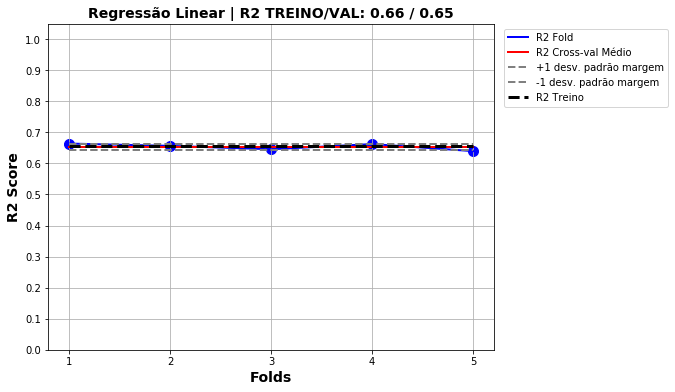

In [42]:
cross_validation_R2_results(modelo = LinearRegression(),
                           nome_modelo = 'Regressão Linear',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

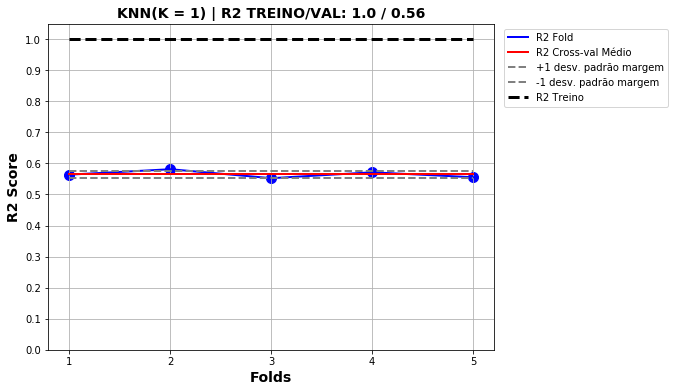

In [43]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 1),
                           nome_modelo = 'KNN(K = 1)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

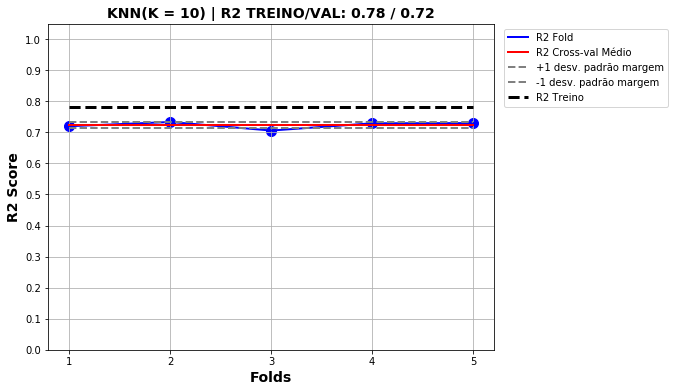

In [44]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 10),
                           nome_modelo = 'KNN(K = 10)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

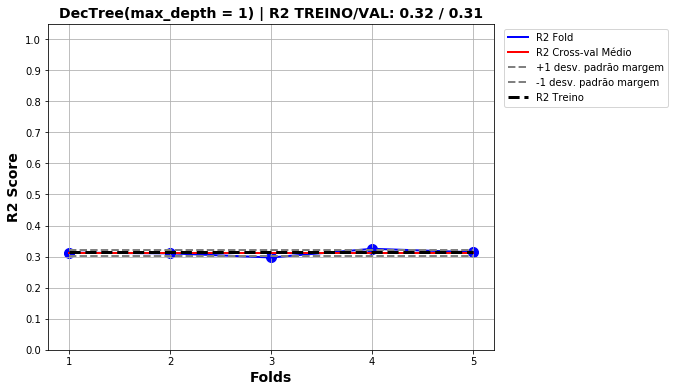

In [45]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 1),
                           nome_modelo = 'DecTree(max_depth = 1)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

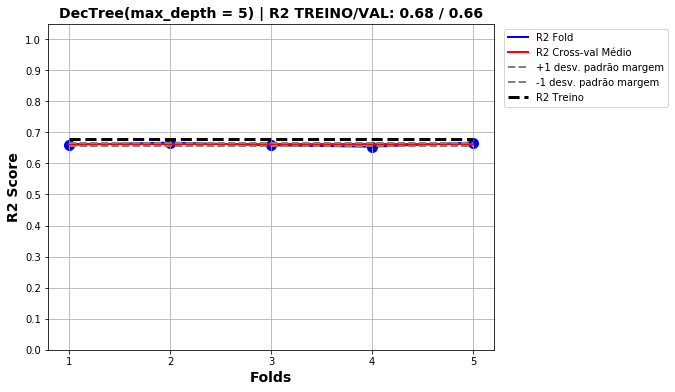

In [46]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 5),
                           nome_modelo = 'DecTree(max_depth = 5)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

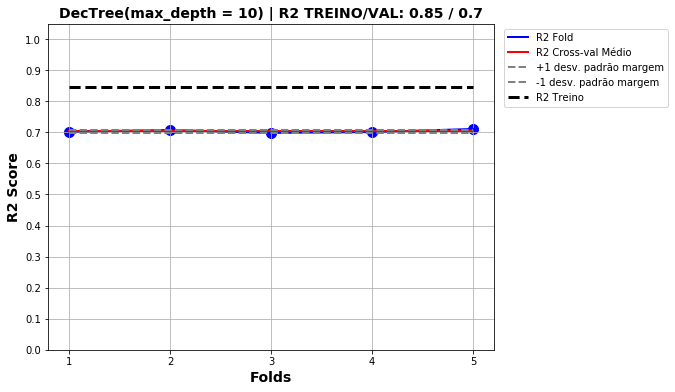

In [47]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 10),
                           nome_modelo = 'DecTree(max_depth = 10)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

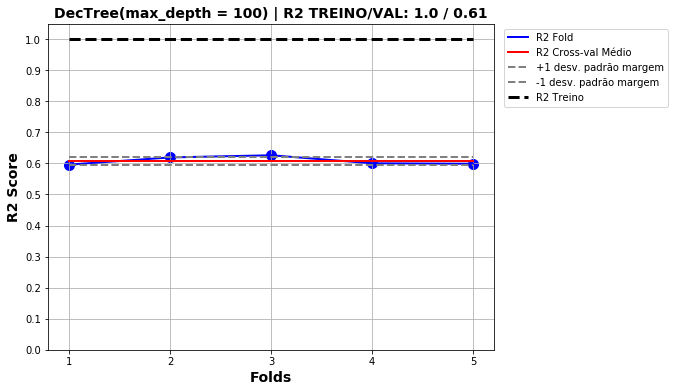

In [48]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 100),
                           nome_modelo = 'DecTree(max_depth = 100)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

<br>


Diante dos resultados acima, vemos que algumas instâncias do KNN e das árvores de decisão estão realmente overfitando os dados de treino.

Além disso, vemos que a regressão linear obteve uma performance ok, mas sendo superada pelo KNN com K = 10 vizinhos.

Desta forma, vamos considerar que nosso modelo final é o KNN(K=10).

Nesta etapa final, vamos treiná-la novamente, usando __todo o conjunto de treinamento__ e finalmente iremos avaliar as métricas (R2) no conjunto de teste:

In [49]:
modelo_final = KNeighborsRegressor(n_neighbors = 10)
modelo_final.fit(Xtrain, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [50]:
preds_modelo_final = modelo_final.predict(Xtest)

In [51]:
#R2 em teste

r2_score(y_true = ytest, y_pred = preds_modelo_final)

0.7189559407995753

Vemos que o R2 em teste ficou similar ao que estávamos encontrando nos dados de treinamento e validação. Desta forma, temos boas indicações de que o KNN(K=10) realmente está generalizando bem o dataset.

<br>

Para finalizar as análises, vamos olhar a dispersão dos preços reais no dataset de teste comparado com os preços preditos pelo modelo; vamos também calcular o RMSE para quantificar, em média, qual o tamanho do erro desses preços:

In [52]:
rmse_teste_final = RMSE(ytrue = ytest, ypred = preds_modelo_final)
rmse_teste_final

60983.69776759564

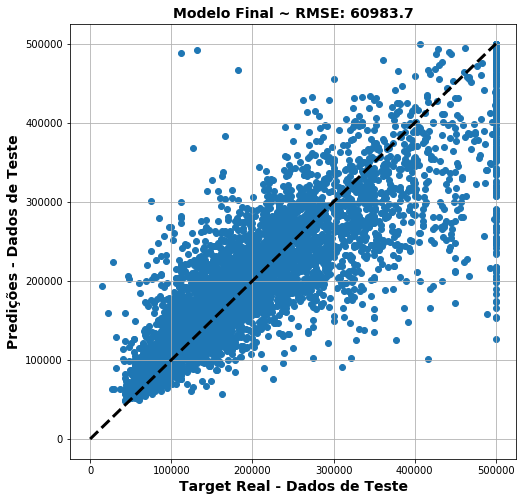

In [53]:
plt.figure(figsize=[8,8])
plt.title("Modelo Final ~ RMSE: " + str(np.round(rmse_teste_final,2)), fontweight = 'bold', fontsize = 14)
plt.scatter(ytest, preds_modelo_final)
plt.xlabel("Target Real - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.ylabel("Predições - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.grid()
range_line = int(np.maximum(max(ytest), max(preds_modelo_final)))
plt.plot(range(1, range_line), range(1, range_line), '--' ,c = 'black', lw = 3)
plt.show()

<br>

Um modelo ideal teria essa dispersão completamente acima da linha preta, o que indicaria que os valores reais do target estão sendo preditos "na mosca". 